In [53]:
import pandas as pd

# Load the dataset
board = pd.read_excel("board2.xlsx")

# Take a quick look
print(df.head())


  student name  Math  Electronics  GEAS  Communication  Gender  \
0     Student1    98           78    86             90    Male   
1     Student2    91           77    90             85  Female   
2     Student3    71           83    78             84  Female   
3     Student4    63           56    83             83    Male   
4     Student5    55           94    89             82  Female   

             Track  Hometown  Average  
0    Communication     Luzon    88.00  
1  Instrumentation   Visayas    85.75  
2    Communication  Mindanao    79.00  
3    Communication  Mindanao    71.25  
4  Instrumentation     Luzon    80.00  


In [54]:
instru = board[
    (board["Track"] == "Instrumentation") &
    (board["Hometown"] == "Luzon")
].copy()
instru["Electronics >70"] = instru["Electronics"] > 70
instru = instru[["Name", "GEAS", "Electronics >70"]]

print("\n=== Instru DataFrame ===")
display(instru)


=== Instru DataFrame ===


,Name,GEAS,Electronics >70
0,S1,75,True
6,S7,60,False
7,S8,64,True
8,S9,63,False
22,S23,74,False
29,S30,57,True


In [56]:
board["Average"] = board[["Math", "Electronics", "GEAS", "Communication"]].mean(axis=1)
mindy = board[
    (board["Hometown"] == "Mindanao") &
    (board["Gender"] == "Female")
].copy()
mindy["Average >=55"] = mindy["Average"] >= 55
mindy = mindy[["Name", "Track", "Electronics", "Average >=55"]]

print("\n=== Mindy DataFrame ===")
display(mindy)


=== Mindy DataFrame ===


,Name,Track,Electronics,Average >=55
1,S2,Communication,75,True
2,S3,Instrumentation,74,True
14,S15,Microelectronics,41,True
16,S17,Microelectronics,79,True
19,S20,Communication,60,True


In [57]:
import matplotlib.pyplot as plt

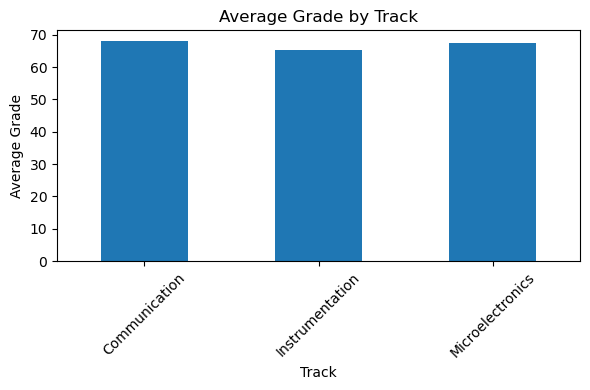

In [59]:
avg_by_track = board.groupby("Track")["Average"].mean()
plt.figure(figsize=(6,4))
avg_by_track.plot(kind="bar")
plt.title("Average Grade by Track")
plt.ylabel("Average Grade")
plt.xlabel("Track")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

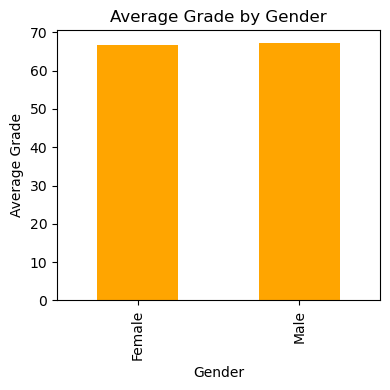

In [61]:
avg_by_gender = board.groupby("Gender")["Average"].mean()
plt.figure(figsize=(4,4))
avg_by_gender.plot(kind="bar", color="orange")
plt.title("Average Grade by Gender")
plt.ylabel("Average Grade")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

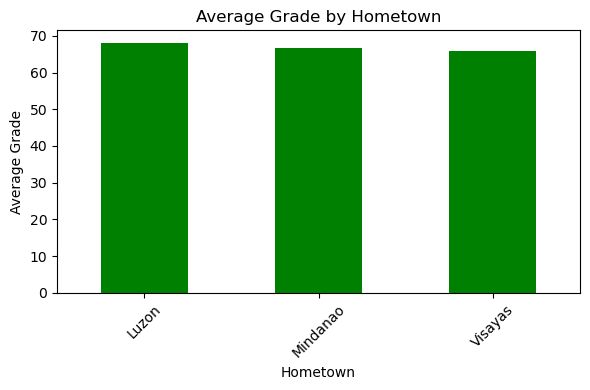

In [62]:
avg_by_home = board.groupby("Hometown")["Average"].mean()
plt.figure(figsize=(6,4))
avg_by_home.plot(kind="bar", color="green")
plt.title("Average Grade by Hometown")
plt.ylabel("Average Grade")
plt.xlabel("Hometown")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()